In [4]:
import pandas as pd

# URL of the dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt'

# Download and load the dataset
df = pd.read_csv(url, header=None)

# Print the first few rows of the dataframe
print(df.head())


         0       1       2        3  4
0  3.62160  8.6661 -2.8073 -0.44699  0
1  4.54590  8.1674 -2.4586 -1.46210  0
2  3.86600 -2.6383  1.9242  0.10645  0
3  3.45660  9.5228 -4.0112 -3.59440  0
4  0.32924 -4.4552  4.5718 -0.98880  0


Average F1-score for 5 nodes: 0.9879763483849192
Average F1-score for 10 nodes: 1.0
Average F1-score for 30 nodes: 1.0
Average F1-score for 60 nodes: 1.0
Average F1-score for 90 nodes: 1.0
Average F1-score for 100 nodes: 1.0
Average F1-score for 110 nodes: 1.0
Best number of nodes in the hidden layer: 10
Test F1-score: 1.0
Train Accuracy: 1.0
Test Accuracy: 1.0


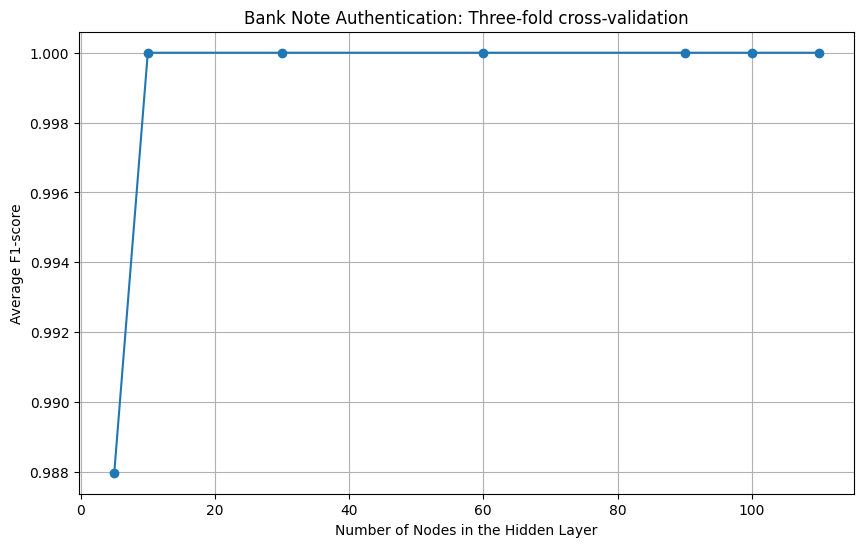

In [6]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Preprocess the dataset
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Normalize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model
# Here we use a simple two-layer neural network (one hidden layer and one output layer)
hidden_layer_sizes = [5, 10, 30, 60, 90, 100, 110]
best_f1_score = 0
best_hidden_layer_size = 0
f1_scores = []

for size in hidden_layer_sizes:
    model = MLPClassifier(hidden_layer_sizes=(size,), learning_rate_init=0.21, max_iter=1000, random_state=42)

    # Perform a 3-fold cross-validation
    scores = cross_val_score(model, X_train, y_train, cv=3, scoring='f1_macro')
    avg_f1_score = np.mean(scores)
    f1_scores.append(avg_f1_score)
    print(f'Average F1-score for {size} nodes: {avg_f1_score}')

    if avg_f1_score > best_f1_score:
        best_f1_score = avg_f1_score
        best_hidden_layer_size = size

print(f'Best number of nodes in the hidden layer: {best_hidden_layer_size}')

# Train the model with the best number of nodes in the hidden layer
model = MLPClassifier(hidden_layer_sizes=(best_hidden_layer_size,), learning_rate_init=0.21, max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# Test the model
y_pred = model.predict(X_test)
print(f'Test F1-score: {f1_score(y_test, y_pred, average="macro")}')


# Calculate the training accuracy
train_accuracy = model.score(X_train, y_train)
print(f'Train Accuracy: {train_accuracy}')

# Calculate the testing accuracy
test_accuracy = model.score(X_test, y_test)
print(f'Test Accuracy: {test_accuracy}')


# Plot the F1-scores vs number of nodes in the hidden layer
plt.figure(figsize=(10, 6))
plt.plot(hidden_layer_sizes, f1_scores, marker='o')
plt.title('Bank Note Authentication: Three-fold cross-validation')
plt.xlabel('Number of Nodes in the Hidden Layer')
plt.ylabel('Average F1-score')
plt.grid(True)
plt.show()


/home/akshat_gosain/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/akshat_gosain/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/akshat_gosain/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/akshat_gosain/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/akshat_gosain/.local/l

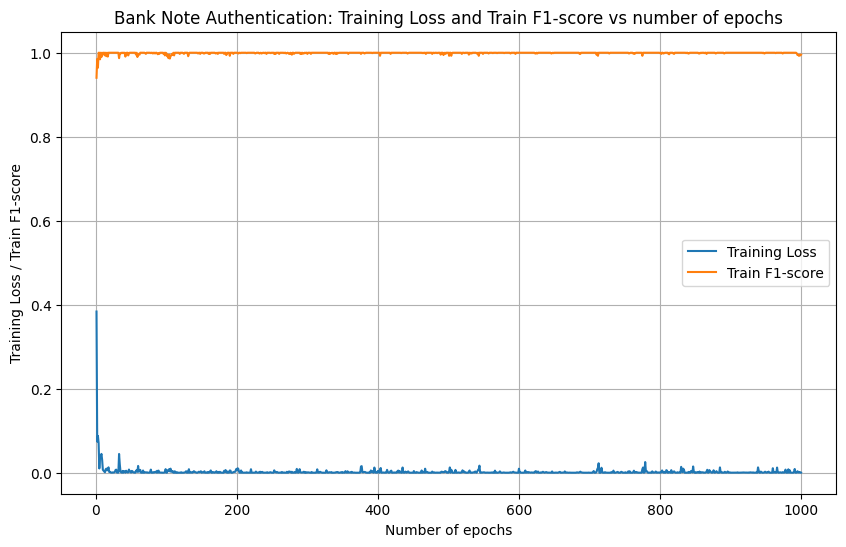

In [3]:
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score

# Initialize lists to store the training loss and F1-score at each epoch
train_loss = []
train_f1 = []

# Train the model with the best number of nodes in the hidden layer
model = MLPClassifier(hidden_layer_sizes=(best_hidden_layer_size,), learning_rate_init=0.21, max_iter=1, warm_start=True, random_state=42)

# We will manually implement the epochs in order to store the training loss and F1-score at each epoch
for epoch in range(1000):
    model.fit(X_train, y_train)
    
    # Calculate the training loss and F1-score at this epoch
    train_loss.append(model.loss_)
    y_pred_train = model.predict(X_train)
    train_f1.append(f1_score(y_train, y_pred_train, average="macro"))

# Plot the training loss and F1-score vs number of epochs
plt.figure(figsize=(10, 6))
plt.plot(range(1, 1001), train_loss, label='Training Loss')
plt.plot(range(1, 1001), train_f1, label='Train F1-score')
plt.title('Bank Note Authentication: Training Loss and Train F1-score vs number of epochs')
plt.xlabel('Number of epochs')
plt.ylabel('Training Loss / Train F1-score')
plt.legend()
plt.grid(True)
plt.show()
